In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
#%config InlineBackend.figure_format = 'retina'

In [2]:
#Importation de la base de do
with open("superstore_final_dataset (1).csv", encoding = 'ISO-8859-1', errors = 'ignore') as df:
    contenu = df.read()
   

In [3]:
#print(contenu)

In [4]:
import io
df=pd.read_csv(io.StringIO(contenu), sep=',')
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.describe(include = 'object')

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Region,Product_ID,Category,Sub_Category,Product_Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,5/9/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


## 1. Calcul du revenu mensuel

In [7]:
# Transformer au format da les variables 'Order_Date' et 'Ship_Date'
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format = 'mixed')

In [8]:
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format = 'mixed')

In [9]:
df['Order_Date']

0      2017-08-11
1      2017-08-11
2      2017-12-06
3      2016-11-10
4      2016-11-10
          ...    
9795   2017-05-21
9796   2016-12-01
9797   2016-12-01
9798   2016-12-01
9799   2016-12-01
Name: Order_Date, Length: 9800, dtype: datetime64[ns]

In [10]:
df['Ship_Date']

0      2017-11-11
1      2017-11-11
2      2017-06-16
3      2016-10-18
4      2016-10-18
          ...    
9795   2017-05-28
9796   2016-01-17
9797   2016-01-17
9798   2016-01-17
9799   2016-01-17
Name: Ship_Date, Length: 9800, dtype: datetime64[ns]

In [11]:
a = df['Order_Date'][0]
a

Timestamp('2017-08-11 00:00:00')

In [12]:
a.day

11

In [13]:
a.month

8

In [14]:
#Recodage des dates au format année-mois
100*a.year + a.month

201708

In [15]:
#Création d'une colonne année-mois et recodage des dates
df['yearmonth'] = df['Order_Date'].map(lambda date: 100*date.year + date.month)

In [16]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,yearmonth
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,201708
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,201708
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,201712
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,201611
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,201611


In [17]:
# Calcul du revenu mensuel
df.groupby('yearmonth')['Sales'].sum()

yearmonth
201501    28828.2540
201502    12588.4840
201503    54027.6920
201504    24710.0160
201505    29520.4900
201506    29181.3346
201507    35194.5580
201508    37349.2655
201509    65956.3998
201510    34561.9470
201511    64369.4565
201512    63568.3107
201601    29347.3864
201602    20728.3520
201603    34489.6776
201604    38056.9685
201605    30761.5585
201606    28515.9082
201607    28573.3100
201608    49076.9300
201609    65352.9970
201610    31631.8890
201611    50009.1450
201612    52891.8832
201701    38048.1840
201702    48907.5900
201703    48990.1410
201704    42368.0480
201705    64836.2518
201706    37424.6810
201707    41761.9430
201708    45766.8144
201709    40692.3063
201710    52156.9580
201711    66392.5470
201712    72847.0855
201801    59767.0910
201802    48928.8334
201803    74748.6238
201804    37849.2156
201805    40882.4464
201806    46912.8475
201807    53942.7755
201808    75408.7840
201809    73153.3640
201810    65501.1622
201811    87997.6400
201

In [18]:
df_revenus = df.groupby('yearmonth')['Sales'].sum().reset_index()
df_revenus

,yearmonth,Sales
0,201501,28828.2540
1,201502,12588.4840
2,201503,54027.6920
3,201504,24710.0160
4,201505,29520.4900
5,201506,29181.3346
6,201507,35194.5580
7,201508,37349.2655
8,201509,65956.3998
9,201510,34561.9470


## 2. Visualisation des revenus mensuels


In [19]:
df_revenus['yearmonth'].dtype

dtype('int64')

In [20]:
df_revenus['yearmonth'] = df_revenus['yearmonth'].astype(str)

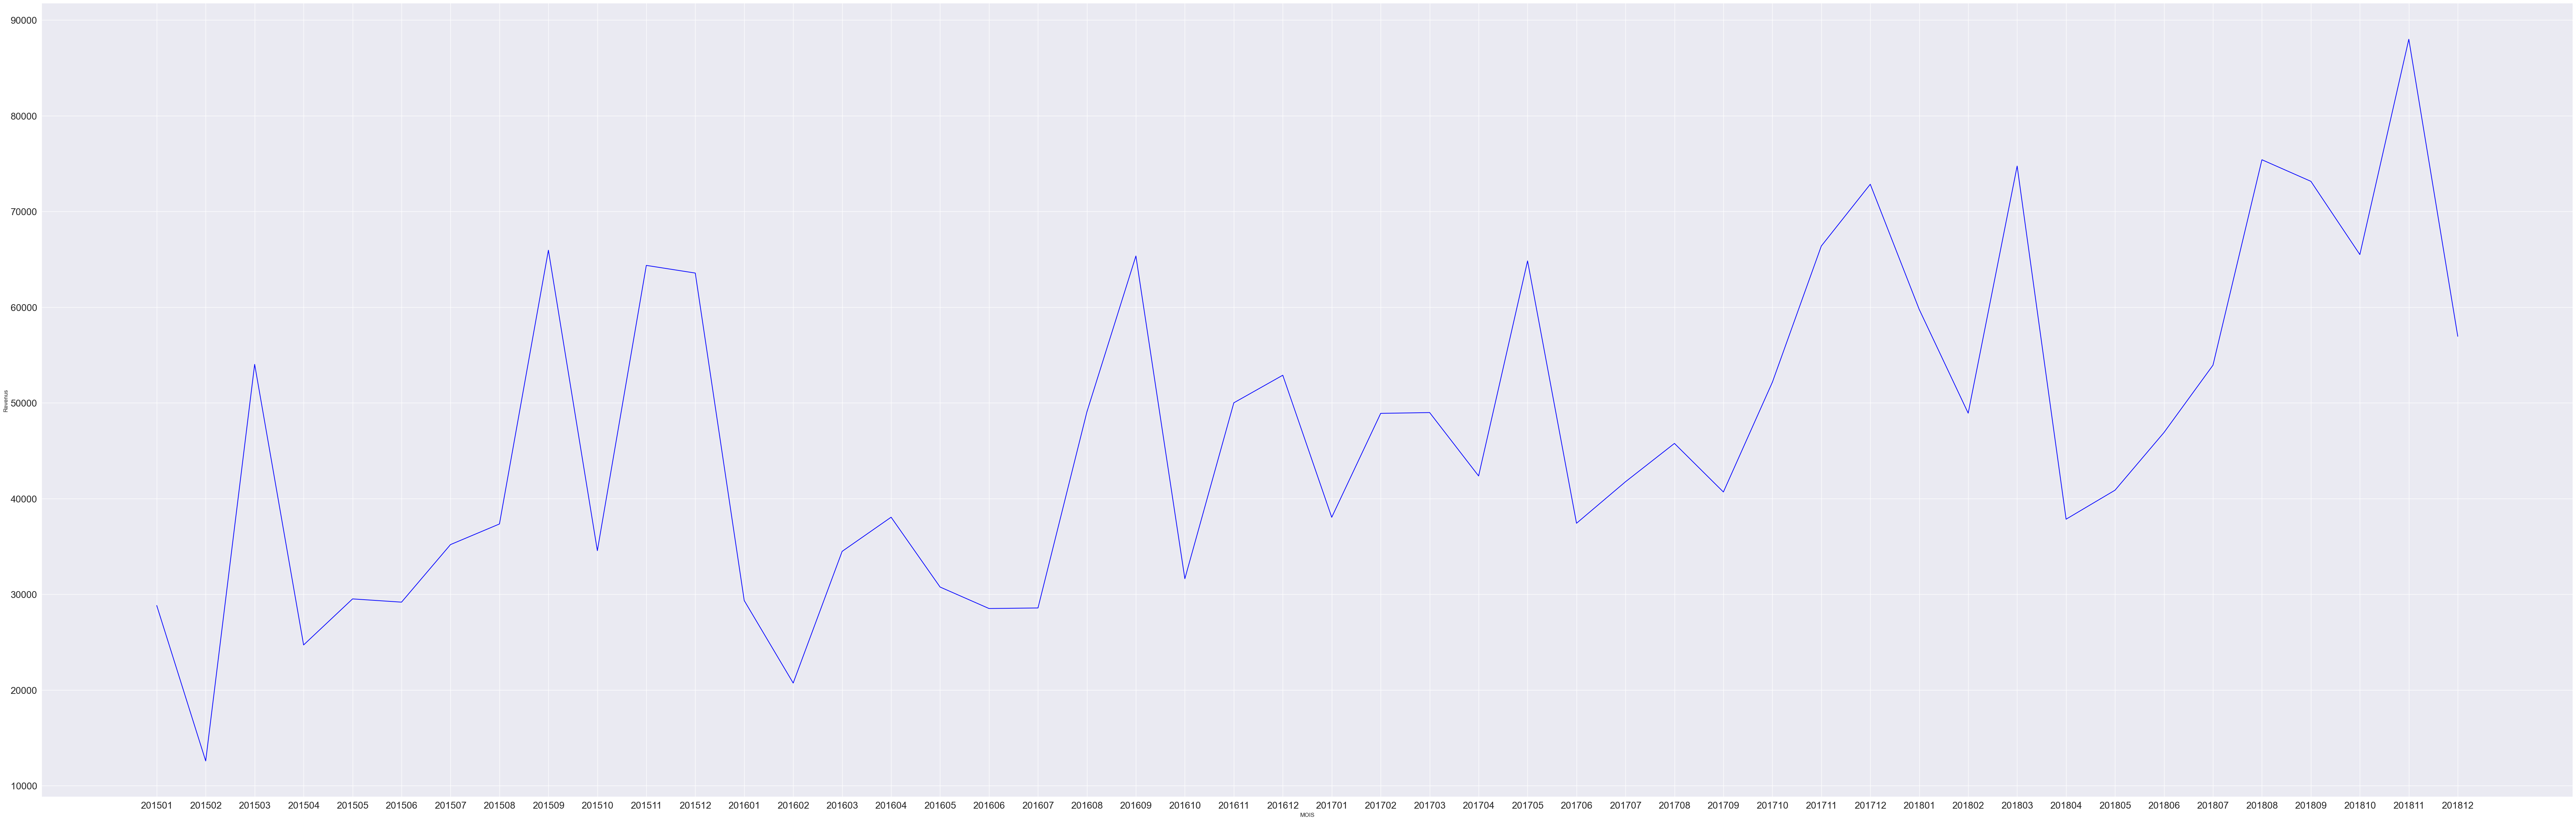

In [23]:
plt.figure(figsize=(95,30))
graph = sns.lineplot(data = df_revenus, x = 'yearmonth', y = 'Sales', color = 'blue')
graph.set(xlabel= 'MOIS', ylabel = 'Revenus')
plt.tick_params(axis='both', which='major', labelsize=20)



##### La superstore a connu des revenus mensuels croissants de façon continuelle durant les trois années d'exercice. Cela peut être dû à la politique des prix, à la croissance de la clientèle, à une politique marketing bien soutenue ou à la fidélité des gros clients. On constate également que la variation du chiffre d'affaire est changeant presque tous les trimestres. Une analyse plus approfondie s'impose.

## 3. Taux de croissance mensuel du revenu

In [25]:
df_revenus['MonthlyGrowth'] = df_revenus['Sales'].pct_change()*100
df_revenus['MonthlyGrowth'] = round(df_revenus['MonthlyGrowth'],2)
df_revenus

,yearmonth,Sales,MonthlyGrowth
0,201501,28828.2540,NaN
1,201502,12588.4840,-56.33
2,201503,54027.6920,329.18
3,201504,24710.0160,-54.26
4,201505,29520.4900,19.47
5,201506,29181.3346,-1.15
6,201507,35194.5580,20.61
7,201508,37349.2655,6.12
8,201509,65956.3998,76.59
9,201510,34561.9470,-47.60


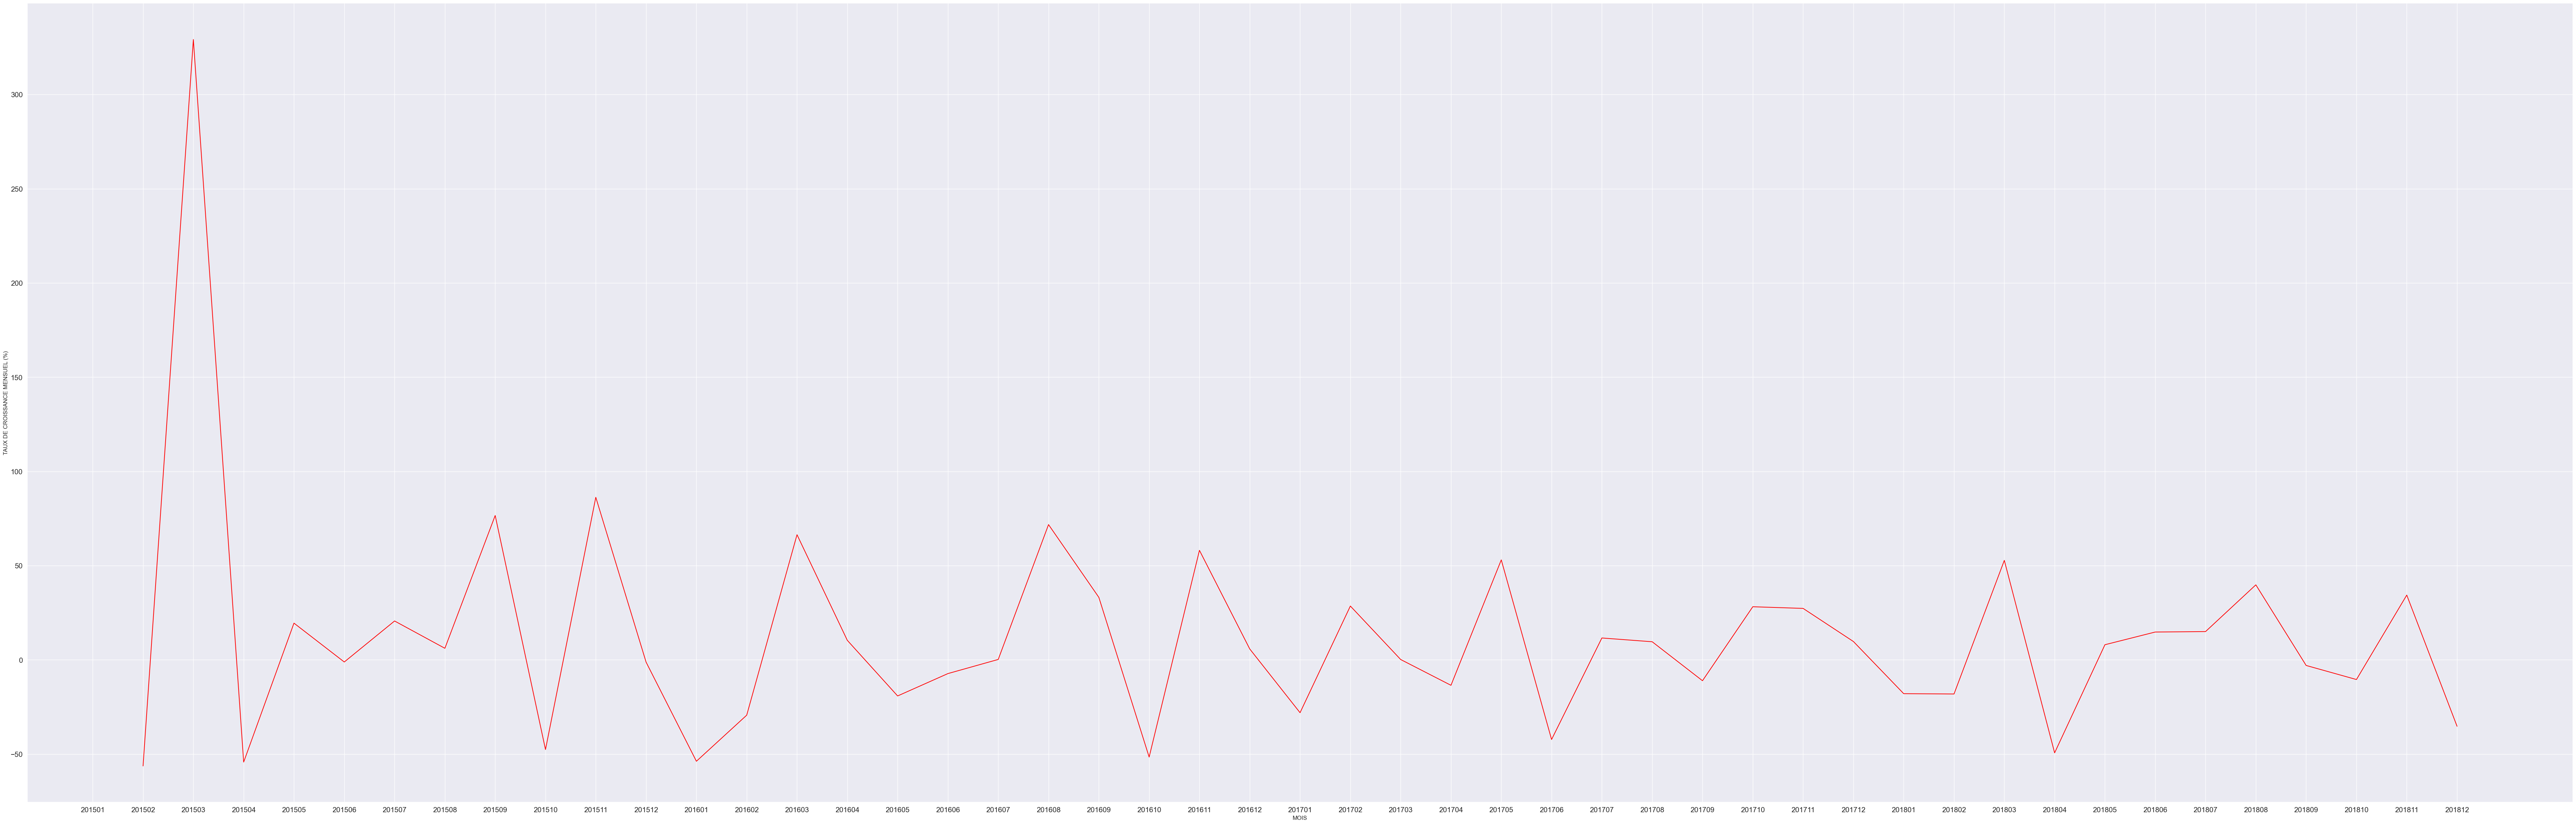

In [26]:
plt.figure(figsize=(95,30))
graph = sns.lineplot(data=df_revenus, x='yearmonth', y='MonthlyGrowth', color = 'red')
graph.set(xlabel='MOIS', ylabel='TAUX DE CROISSANCE MENSUEL (%)')
plt.tick_params(axis='both', which='major', labelsize=15)

##### Le taux de croissance du Superstore s'est fortement élevé dans le premier trimestre d'exrcice. Cela peut s'expliquer par une forte acquisition de clients doublée d'une promotion d'ouverture. Ce qui en effet peut encourager de gros acheteurs. Par contre, à la fin de ce trimestre le taux est revenu au point de départ. Il est important de communiquer à l'analyste l'évènement qui a pû influencer le t aux de ventes.

## 4. Nombre de clients actifs par mois

In [27]:
df_monthlyactive = df.groupby('yearmonth')['Customer_ID'].nunique().reset_index()
df_monthlyactive

,yearmonth,Customer_ID
0,201501,54
1,201502,46
2,201503,76
3,201504,59
4,201505,75
5,201506,66
6,201507,68
7,201508,68
8,201509,102
9,201510,61


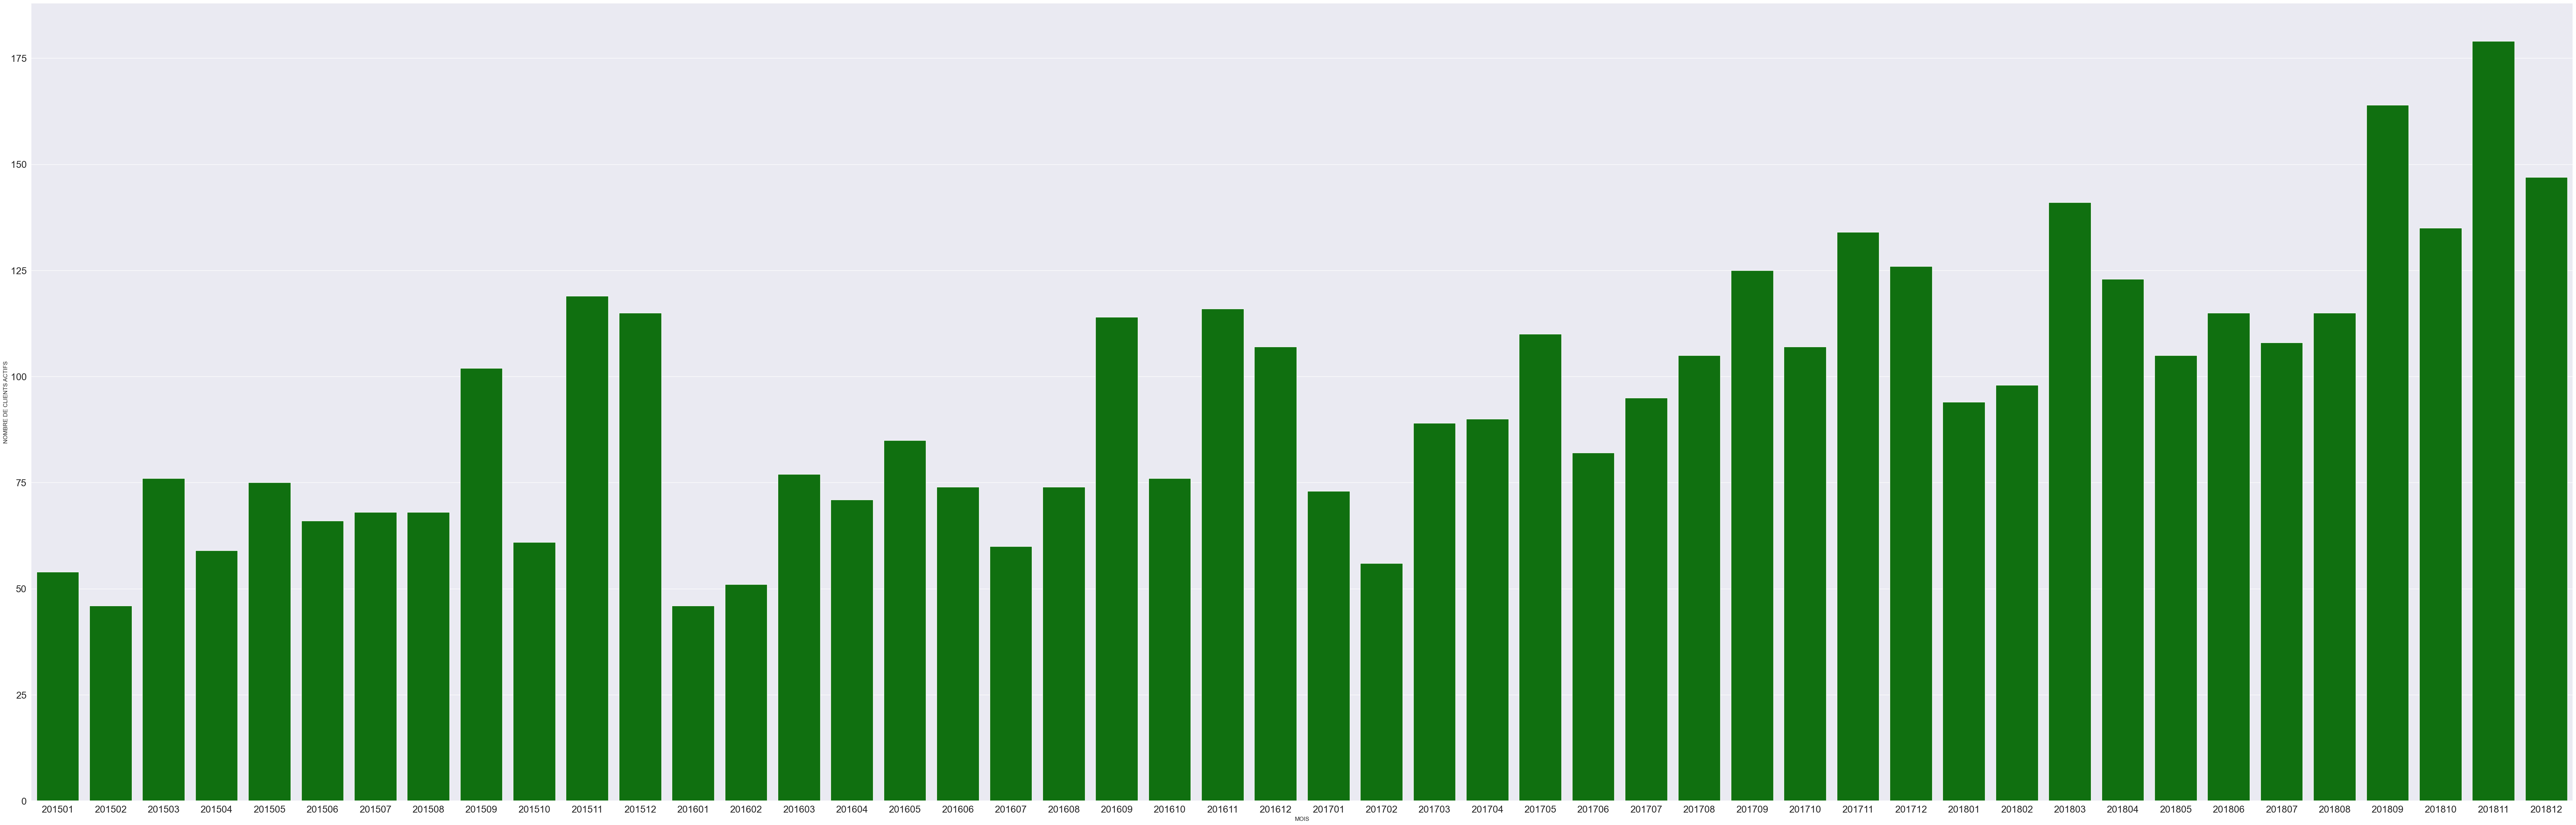

In [28]:
plt.figure(figsize=(95,30))
graph = sns.barplot(x='yearmonth', y='Customer_ID', data=df_monthlyactive, color='green')
graph.set(xlabel='MOIS', ylabel='NOMBRE DE CLIENTS ACTIFS')
plt.tick_params(axis='both', which='major', labelsize=20)

##### En général, l'hystogramme montre que pendant trois années le nombre de clients actifs par mois a été croissant. On peut donc soupçonner une bonne fidélisation de ses clients par le superstore en plus d'une acquisition continuelle de nouveaux clients. 

### Progression de la clientèle

In [29]:
df_monthlyactive['Progression'] = df_monthlyactive['Customer_ID'].pct_change()*100
df_monthlyactive['Progression'] = round(df_monthlyactive['Progression'],2)
df_monthlyactive

,yearmonth,Customer_ID,Progression
0,201501,54,NaN
1,201502,46,-14.81
2,201503,76,65.22
3,201504,59,-22.37
4,201505,75,27.12
5,201506,66,-12.00
6,201507,68,3.03
7,201508,68,0.00
8,201509,102,50.00
9,201510,61,-40.20


In [30]:
df_monthlynewcustomer = df.groupby('Customer_ID')['Order_Date'].min().reset_index()
df_monthlynewcustomer 

,Customer_ID,Order_Date
0,AA-10315,2015-03-31
1,AA-10375,2015-04-21
2,AA-10480,2015-04-05
3,AA-10645,2015-01-12
4,AB-10015,2015-02-18
...,...,...
788,XP-21865,2015-01-20
789,YC-21895,2015-11-17
790,YS-21880,2016-07-25
791,ZC-21910,2015-10-13


In [31]:
df_monthlynewcustomer.columns = [ 'Customer_ID', 'Purchase_Date']
df_monthlynewcustomer

,Customer_ID,Purchase_Date
0,AA-10315,2015-03-31
1,AA-10375,2015-04-21
2,AA-10480,2015-04-05
3,AA-10645,2015-01-12
4,AB-10015,2015-02-18
...,...,...
788,XP-21865,2015-01-20
789,YC-21895,2015-11-17
790,YS-21880,2016-07-25
791,ZC-21910,2015-10-13


In [32]:
#Reformatage des dates
df_monthlynewcustomer['Purchase_YearMonth'] = df_monthlynewcustomer['Purchase_Date'].map( lambda date : 100*date.year+date.month)
df_monthlynewcustomer

,Customer_ID,Purchase_Date,Purchase_YearMonth
0,AA-10315,2015-03-31,201503
1,AA-10375,2015-04-21,201504
2,AA-10480,2015-04-05,201504
3,AA-10645,2015-01-12,201501
4,AB-10015,2015-02-18,201502
...,...,...,...
788,XP-21865,2015-01-20,201501
789,YC-21895,2015-11-17,201511
790,YS-21880,2016-07-25,201607
791,ZC-21910,2015-10-13,201510


In [33]:
df=pd.merge(df, df_monthlynewcustomer, on = 'Customer_ID')


In [34]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,yearmonth,Purchase_Date,Purchase_YearMonth
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,201708,2016-10-15,201610
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,201708,2016-10-15,201610
2,5492,CA-2018-164098,2018-01-26,2018-01-27,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,...,77070.0,Central,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",18.160,201801,2016-10-15,201610
3,6878,US-2016-123918,2016-10-15,2016-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,75217.0,Central,FUR-FU-10004952,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder w/...,131.376,201610,2016-10-15,201610
4,6879,US-2016-123918,2016-10-15,2016-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,75217.0,Central,OFF-PA-10003001,Office Supplies,Paper,Xerox 1986,5.344,201610,2016-10-15,201610


In [35]:
#Création de la varable "Usertype" qui indique si un clients est Nouveau ou Habituel

df['UserType'] = 'New customer'

In [36]:
#Définissons une condition pour effectuer cette classification

condition = df['Order_Date']>df['Purchase_Date']
condition

0        True
1        True
2        True
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [37]:
df.loc[condition, 'UserType'] = 'Usual Customer'

In [38]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,yearmonth,Purchase_Date,Purchase_YearMonth,UserType
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,201708,2016-10-15,201610,Usual Customer
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,201708,2016-10-15,201610,Usual Customer
2,5492,CA-2018-164098,2018-01-26,2018-01-27,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,...,Central,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",18.160,201801,2016-10-15,201610,Usual Customer
3,6878,US-2016-123918,2016-10-15,2016-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,Central,FUR-FU-10004952,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder w/...,131.376,201610,2016-10-15,201610,New customer
4,6879,US-2016-123918,2016-10-15,2016-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,Central,OFF-PA-10003001,Office Supplies,Paper,Xerox 1986,5.344,201610,2016-10-15,201610,New customer


In [39]:
df.UserType.value_counts()

UserType
Usual Customer    8156
New customer      1644
Name: count, dtype: int64

##### Vérification : Un nouveau client est celui dont la date de transation est égale à la date de premier achat

In [40]:
df[df['Order_Date'] == df['Purchase_Date']].shape

(1644, 22)

### Combien ont rapportés les anciens clients et les nouveaux clients comme ventes par mois ?

In [41]:
df_UserType_sales = df.groupby(['yearmonth', 'UserType'])['Sales'].sum().reset_index()
df_UserType_sales

,yearmonth,UserType,Sales
0,201501,New customer,28282.3140
1,201501,Usual Customer,545.9400
2,201502,New customer,11924.8380
3,201502,Usual Customer,663.6460
4,201503,New customer,48355.8090
...,...,...,...
86,201809,Usual Customer,72115.1040
87,201810,New customer,1610.2670
88,201810,Usual Customer,63890.8952
89,201811,Usual Customer,87997.6400


### Représentation

In [42]:
df_UserType_sales['yearmonth'].dtype

dtype('int64')

In [43]:
df_UserType_sales['yearmonth'] = df_UserType_sales['yearmonth'].astype(str)

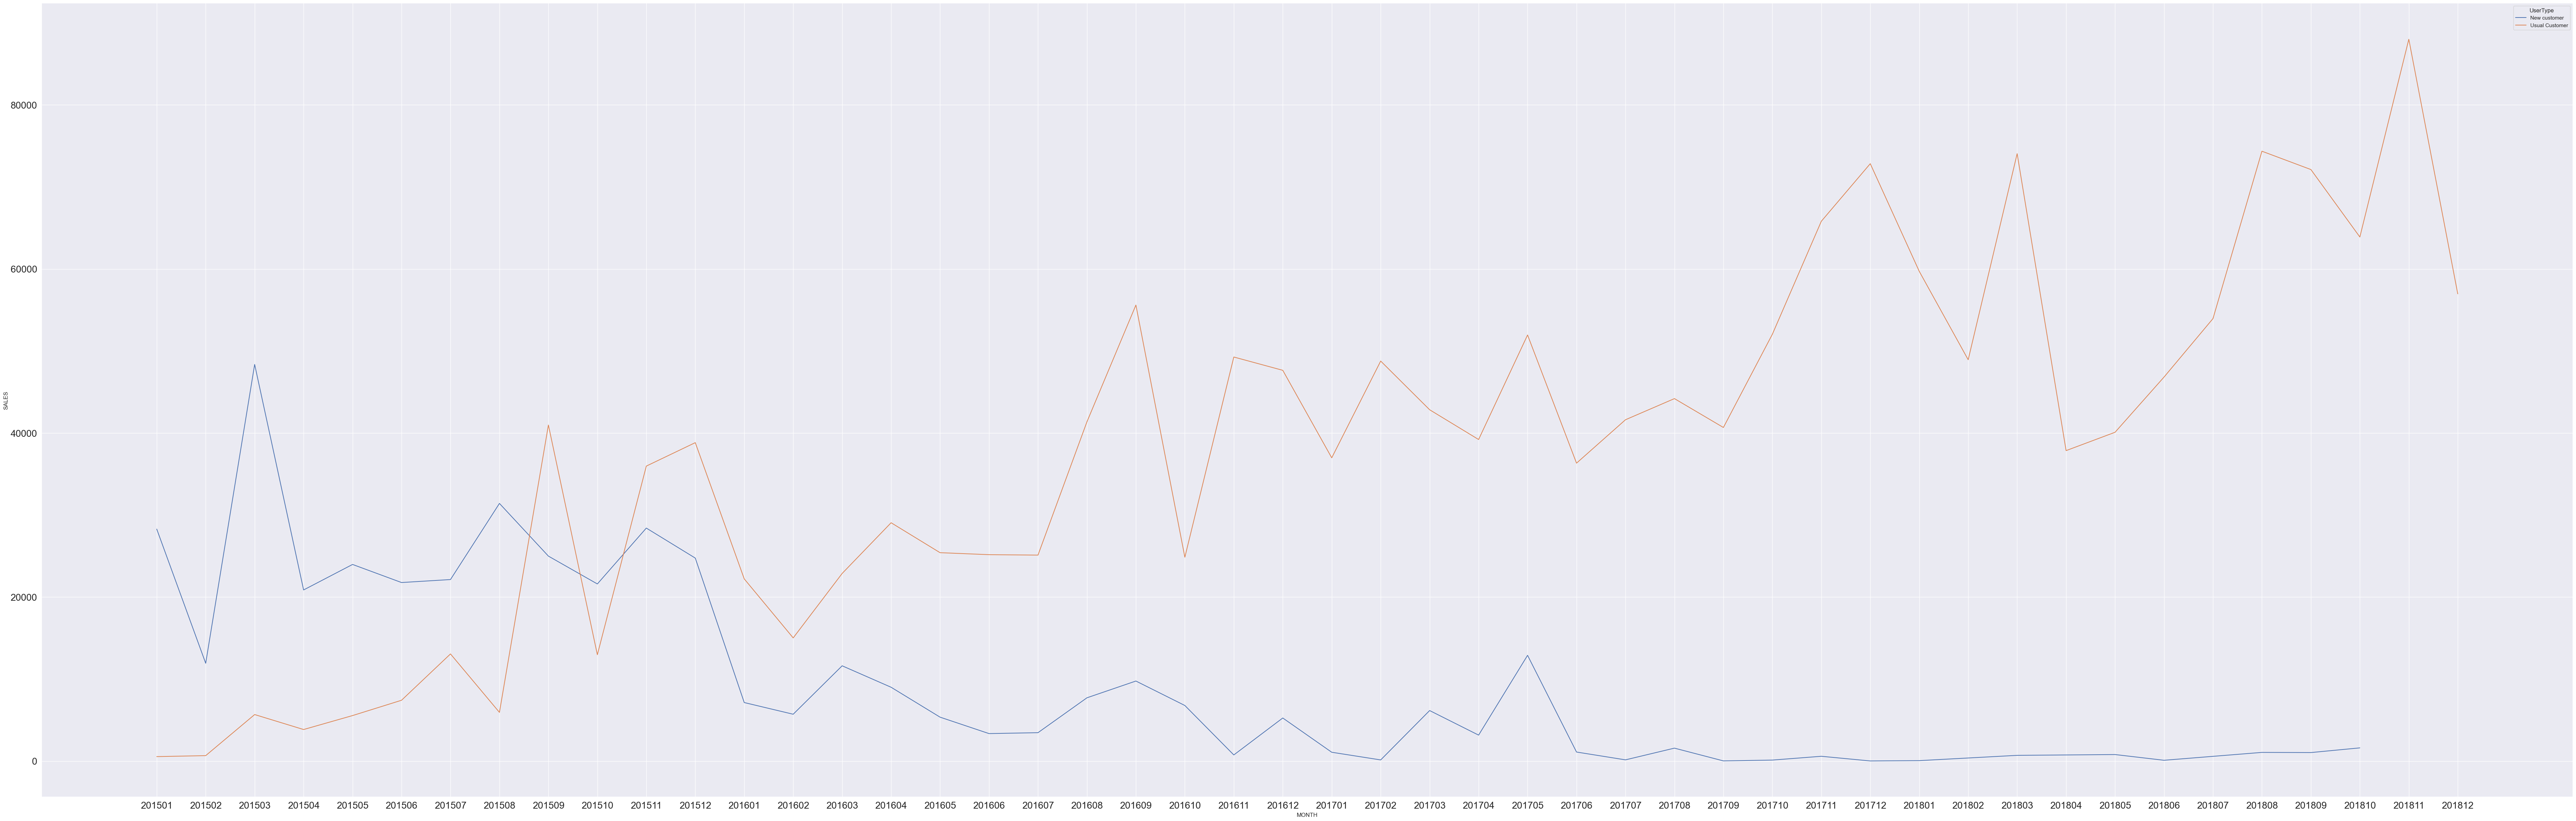

In [44]:
plt.figure(figsize = (95,30))
graph = sns.lineplot( data = df_UserType_sales , x= 'yearmonth' , y = 'Sales' , hue = 'UserType')
graph.set( xlabel = 'MONTH' , ylabel = 'SALES')
plt.tick_params(axis='both', which='major', labelsize=20)

##### En bleu: le revenu rapporté par les nouveaux clients. En rouge : le revenu rapporté par les anciens clients. Supposant qu'un nouveau client est un acheteur qui a fait sa première course à une date T, on peut retenir que le superstore a enregistré le plus grand nombre de clients dans sa première année. Lesquels sont devenus ses plus gros clients. D'où une forte tendance du revenu rapporté par les anciens clients (clients fidèles). La tendance des revenus des nouveaux clients est baissière. Les clients s'ils sont fortement fidélisés commencent donc avec de petits achats.


## 6. Calculons le ratio Client


In [45]:
# Effectif des anciens clients par mois
df_newcustomer_monthly_size1 = df.query("UserType == 'New Customer'").groupby(['yearmonth'])['Customer_ID'].nunique()
df_newcustomer_monthly_size1

Series([], Name: Customer_ID, dtype: int64)

In [46]:
#Effectif des nouveaux clients par mois
df_newcustomer_monthly_size2 = df.query("UserType == 'Usual Customer'").groupby(['yearmonth'])['Customer_ID'].nunique()
df_newcustomer_monthly_size2

yearmonth
201501      1
201502      2
201503     12
201504     16
201505     14
201506     19
201507     30
201508     24
201509     54
201510     23
201511     70
201512     74
201601     34
201602     38
201603     62
201604     55
201605     70
201606     63
201607     51
201608     63
201609     98
201610     69
201611    111
201612     99
201701     66
201702     54
201703     79
201704     81
201705    106
201706     78
201707     91
201708    103
201709    124
201710    106
201711    128
201712    125
201801     93
201802     98
201803    139
201804    123
201805    104
201806    114
201807    108
201808    114
201809    163
201810    132
201811    179
201812    147
Name: Customer_ID, dtype: int64

In [47]:
df_ratio_Client = df_newcustomer_monthly_size1 / df_newcustomer_monthly_size2
df_ratio_Client

yearmonth
201501   NaN
201502   NaN
201503   NaN
201504   NaN
201505   NaN
201506   NaN
201507   NaN
201508   NaN
201509   NaN
201510   NaN
201511   NaN
201512   NaN
201601   NaN
201602   NaN
201603   NaN
201604   NaN
201605   NaN
201606   NaN
201607   NaN
201608   NaN
201609   NaN
201610   NaN
201611   NaN
201612   NaN
201701   NaN
201702   NaN
201703   NaN
201704   NaN
201705   NaN
201706   NaN
201707   NaN
201708   NaN
201709   NaN
201710   NaN
201711   NaN
201712   NaN
201801   NaN
201802   NaN
201803   NaN
201804   NaN
201805   NaN
201806   NaN
201807   NaN
201808   NaN
201809   NaN
201810   NaN
201811   NaN
201812   NaN
Name: Customer_ID, dtype: float64